In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.parser import parse
from os import path

In [ ]:
#######################################
# Read data from processedData.csv
#######################################
# Data types of columns to read from the folder
dataTypes = ['U36','f', 'f', 'f', 'f', 'f', 'f', 'i', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'i' ]

data = np.genfromtxt("labeledNormalizedData_small.csv", dtype=dataTypes,
                    delimiter=',', names=True, usecols=np.arange(0, 101))

pd_data = pd.DataFrame(data=data, columns=data.dtype.names)
pd_data["datetime"] = pd.to_datetime(pd_data["datetime"])
pd_data.head

In [86]:
#######################################
# Read data from "processedData2021-03-28.csv"
#######################################
# Data types of columns to read from the folder
dataTypes = ['U36','f', 'f', 'f', 'f', 'f', 'f', 'i', 'U36',
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'f', 'f', 'f', 'f', 'f', 
'f', 'f', 'i' ]

data = np.genfromtxt("processedData2021-03-28.csv", dtype=dataTypes,
                    delimiter=',', names=True, usecols=np.arange(0, 57))
pd_data = pd.DataFrame(data=data, columns=data.dtype.names)
pd_data["datetime"] = pd.to_datetime(pd_data["datetime"])
pd_data.head

<bound method NDFrame.head of                                datetime  ask_price  bid_price  mark_price  \
0      2020-09-23 19:42:02.484146-05:00   0.012168   0.011665    0.011852   
1      2020-09-23 19:42:17.444203-05:00   0.014795   0.015018    0.014843   
2      2020-09-23 19:42:32.437536-05:00   0.014495   0.013774    0.014072   
3      2020-09-23 19:43:02.509043-05:00   0.014795   0.014540    0.014604   
4      2020-09-23 19:43:17.453045-05:00   0.014795   0.014540    0.014604   
...                                 ...        ...        ...         ...   
164306 2020-10-31 23:58:17.553939-05:00   0.728272   0.728006    0.728362   
164307 2020-10-31 23:58:32.550125-05:00   0.727857   0.727584    0.727943   
164308 2020-10-31 23:59:02.550698-05:00   0.726820   0.726310    0.726787   
164309 2020-10-31 23:59:17.572420-05:00   0.726440   0.726212    0.726548   
164310 2020-10-31 23:59:32.580375-05:00   0.726420   0.727289    0.727077   

        high_price  low_price  open_price  vo

In [ ]:
pd_data['minmax'].mean

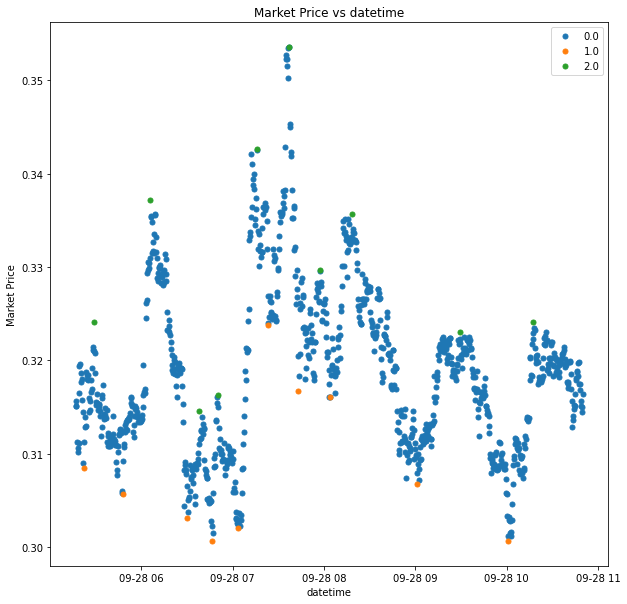

In [93]:
# sub_data = pd_data
# sub_data = pd_data.head(10000)
sub_data = pd_data.iloc[19000:20000,:]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['ask_price'],
#         color='green',
#         label="ask_price")

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['bid_price'],
#         color='blue',
#         label="bid_price")

# Set title and labels for axes

groups = sub_data.groupby('minmax')
for name, group in groups:
    # Add x-axis and y-axis
    ax.plot(group.datetime, group.mark_price, marker='o', linestyle='', markersize=5, label=name)

ax.set(xlabel="datetime", ylabel="Market Price", title="Market Price vs datetime")

plt.legend()
plt.show()

In [ ]:
sub_data = pd_data
# sub_data = pd_data.head(1000)
# sub_data = pd_data.iloc[::25,:]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['ask_price'],
#         color='green',
#         label="ask_price")

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['bid_price'],
#         color='blue',
#         label="bid_price")

# Set title and labels for axes

groups = pd_data.groupby('minmax')
for name, group in groups:
    # Add x-axis and y-axis
    ax.plot(group.mark_price_1D_velocity, group.mark_price, marker='o', linestyle='', markersize=1, label=name)

ax.set(xlabel="vel", ylabel="Market Price", title="Market Price vs vel")

plt.legend()
plt.show()

In [ ]:
Potentail Imporant Columns, Visually: 
mark_price_1h_velocity
mark_price_1h_mean

In [ ]:
sub_data = pd_data
# sub_data = pd_data.head(1000)
# sub_data = pd_data.iloc[::25,:]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['ask_price'],
#         color='green',
#         label="ask_price")

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['bid_price'],
#         color='blue',
#         label="bid_price")

# Set title and labels for axes

groups = pd_data.groupby('minmax')
for name, group in groups:
    # Add x-axis and y-axis
    ax.plot(group.mark_price_1h_velocity, group.mark_price_1h_mean, marker='o', linestyle='', markersize=1, label=name)

ax.set(xlabel="velocity", ylabel="mean", title="velocity vs mean")

plt.legend()
plt.show()

In [ ]:
rollingData["mark_price_temp_1D_velocity"] = rollingData["mark_price"].rolling(window=1440, min_periods=100).apply(lambda x: (x[-1]-x[0])/DurationMin.get(duration))

In [ ]:
sub_data = pd_data
# sub_data = pd_data.head(1000)
# sub_data = pd_data.iloc[::25,:]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['ask_price'],
#         color='green',
#         label="ask_price")

# # Add x-axis and y-axis
# ax.plot(sub_data['datetime'],
#         sub_data['bid_price'],
#         color='blue',
#         label="bid_price")

# Set title and labels for axes

groups = pd_data.groupby('minmax')
for name, group in groups:
    # Add x-axis and y-axis
    ax.plot(group.datetime, group.mark_price_3h_velocity, marker='o', linestyle='', markersize=1, label=name)

ax.set(xlabel="datetime", ylabel="varied", title="datetime vs varied")

plt.legend()
plt.show()